<a href="https://colab.research.google.com/github/abdgazalaa241992-cmyk/lab/blob/main/IGU_Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mining Association Rules

Information about which products are frequently purchased by your customers
following their purchases of a PC and a digital camera in sequence would be very
helpful in making your recommendation.

Frequent patterns and association rules are the knowledge that you want to mine in
such a scenario.

Frequent patterns are patterns that appear frequently in a dataset.

For example, a set of items, such as milk and bread, that appear
frequently together in a transaction data set is a frequent itemset.

A typical example of frequent itemset mining is **market basket analysis**.

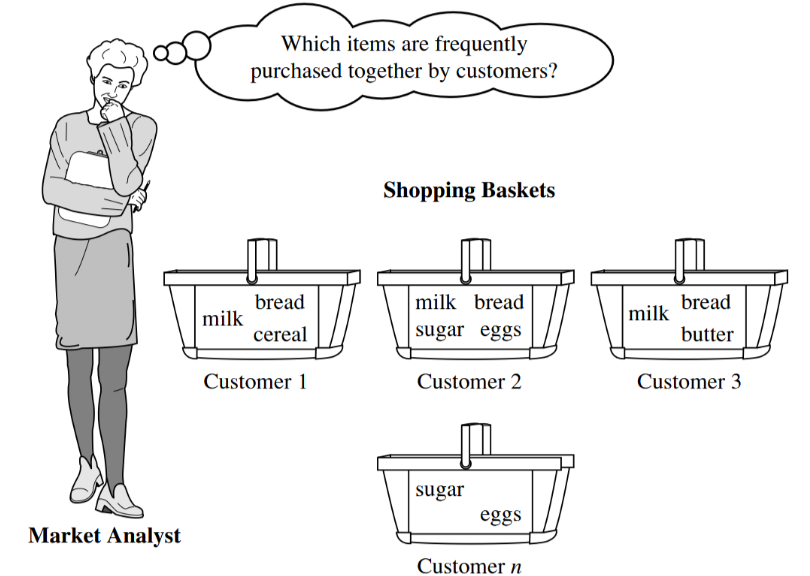


Algorithms to mine frequent patterns:
1. Apriori algorithm.
2. FP Growth algorithm.
3. ECLAT algorithm

# 1- Apriori

**Example:**

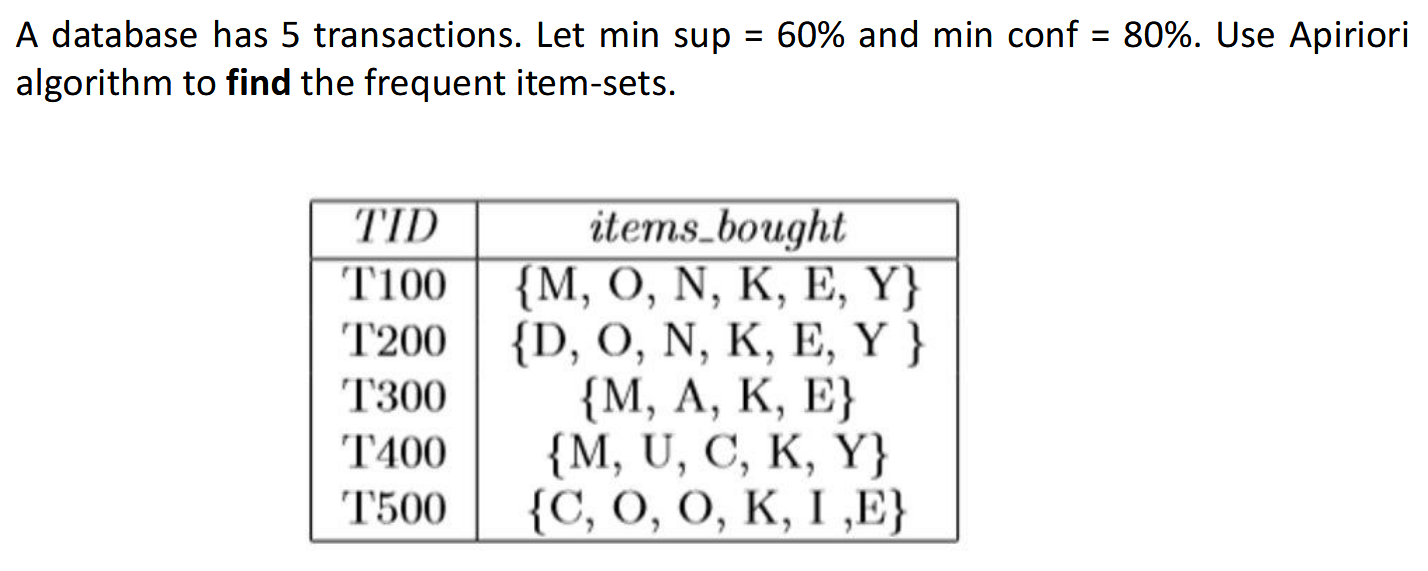

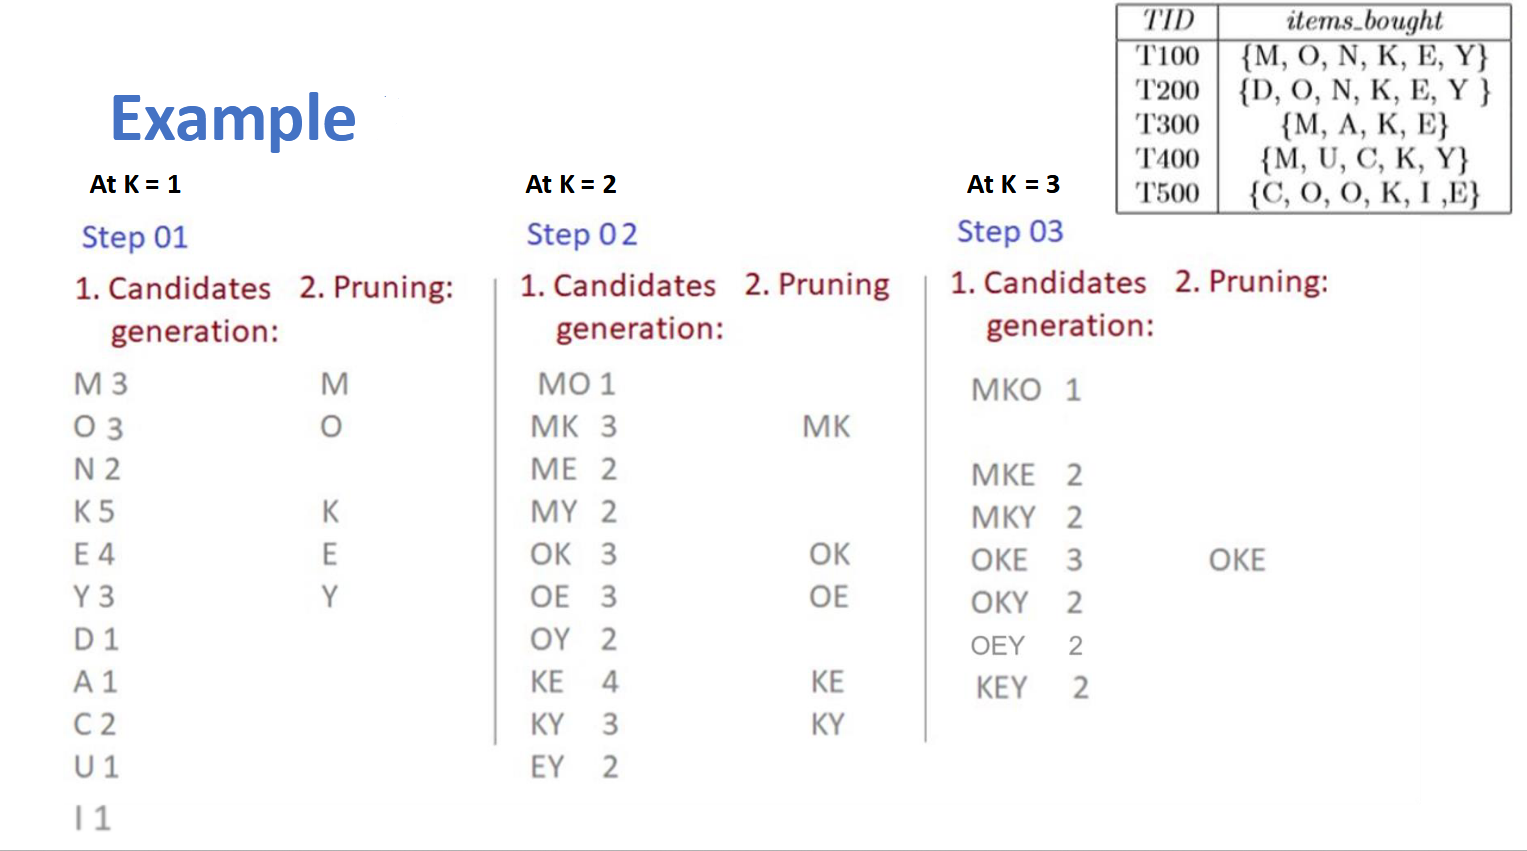

In [ ]:
# Apriori implementation using mlxtend

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder # converts a list of transactions (list of item strings) into a binary matrix (one-hot encoding).
from mlxtend.frequent_patterns import apriori, association_rules

# Dataset
transactions = [
    ['E','K','M','N','O','Y'],        # T1
    ['D','E','K','N','O','Y'],        # T2
    ['A','E','K','M'],                # T3
    ['C','K','M','U','Y'],            # T4
    ['C','E','I','K','O']             # T5
]

# One-hot encoding
'''
|    | A | C | D | E | I | K | M | N | O | U | Y |
| -- | - | - | - | - | - | - | - | - | - | - | - |
| T1 | 0 | 0 | 0 | 1 | 0 | 1 | 1 | 1 | 1 | 0 | 1 |
| T2 | 0 | 0 | 1 | 1 | 0 | 1 | 0 | 1 | 1 | 0 | 1 |
| T3 | 1 | 0 | 0 | 1 | 0 | 1 | 1 | 0 | 0 | 0 | 0 |
| T4 | 0 | 1 | 0 | 0 | 0 | 1 | 1 | 0 | 0 | 1 | 1 |
| T5 | 0 | 1 | 0 | 1 | 1 | 1 | 0 | 0 | 1 | 0 | 0 |

'''
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

# Apriori (support as fraction)
frequent_itemsets = apriori(
    df,
    min_support=0.60,   # support count = 3
    use_colnames=True
)

# Generate association rules
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.80
)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents','consequents','support','confidence','lift']])


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Frequent Itemsets:
    support   itemsets
0       0.8        (E)
1       1.0        (K)
2       0.6        (M)
3       0.6        (O)
4       0.6        (Y)
5       0.8     (E, K)
6       0.6     (E, O)
7       0.6     (M, K)
8       0.6     (O, K)
9       0.6     (Y, K)
10      0.6  (E, O, K)

Association Rules:
  antecedents consequents  support  confidence  lift
0         (E)         (K)      0.8         1.0  1.00
1         (K)         (E)      0.8         0.8  1.00
2         (O)         (E)      0.6         1.0  1.25
3         (M)         (K)      0.6         1.0  1.00
4         (O)         (K)      0.6         1.0  1.00
5         (Y)         (K)      0.6         1.0  1.00
6      (E, O)         (K)      0.6         1.0  1.00
7      (O, K)         (E)      0.6         1.0  1.25
8         (O)      (E, K)      0.6         1.0  1.25


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

We generate lots of useless combinations
(candidates) that are pruned later.

To overcome this limitation, use FP Growth
algorithm.

# 2- FP-Growth

 The FP-growth algorithm is a more efficient algorithm for finding
frequent itemsets that uses a tree-based data structure to represent
frequent itemsets and their support counts.

**Steps:**
1. Compute the frequency of single items.
2. Apply the min. Support and order the items descending.
3. Create ordered item-set, remove duplicate and apply min. Support.
4. Create the tree at all transactions.
5. Create conditional pattern base (CPB) (branches of the tree, sorting
ascending).
6. Create conditional frequent pattern tree (CPT) (apply min support
and aggregate over CPB).
7. Pair CPT with individual items to get the final frequent patterns.

**Example:**
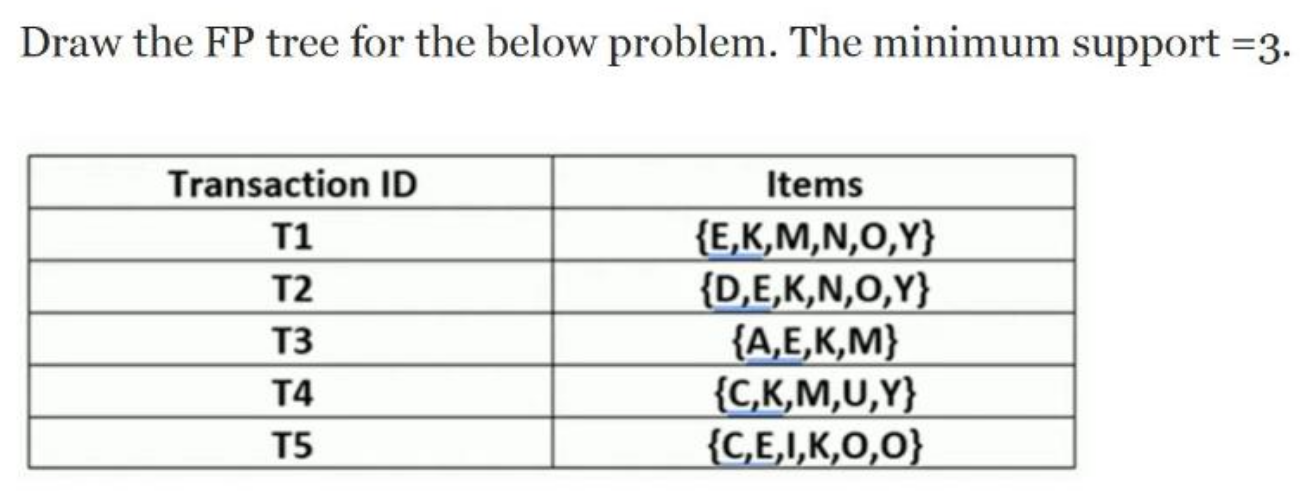

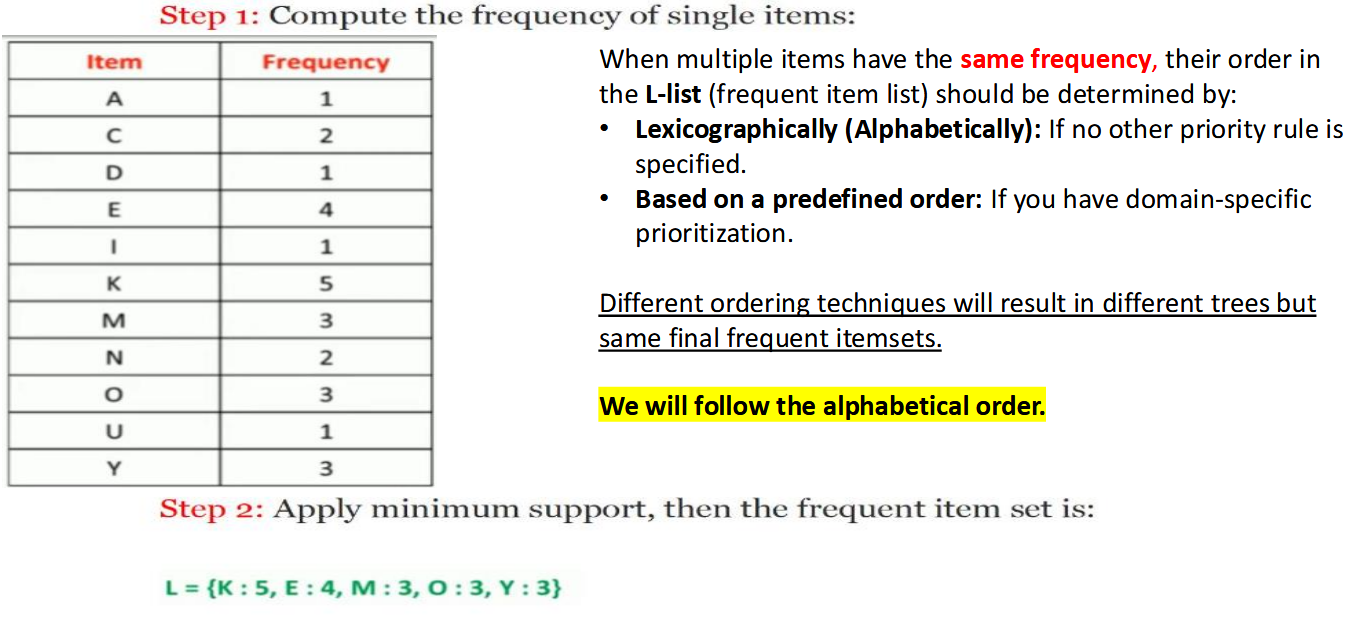

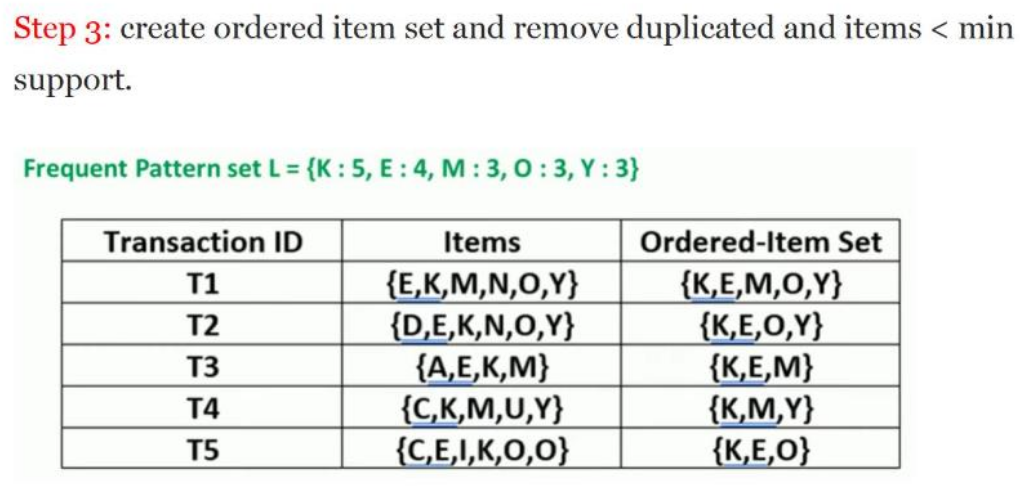

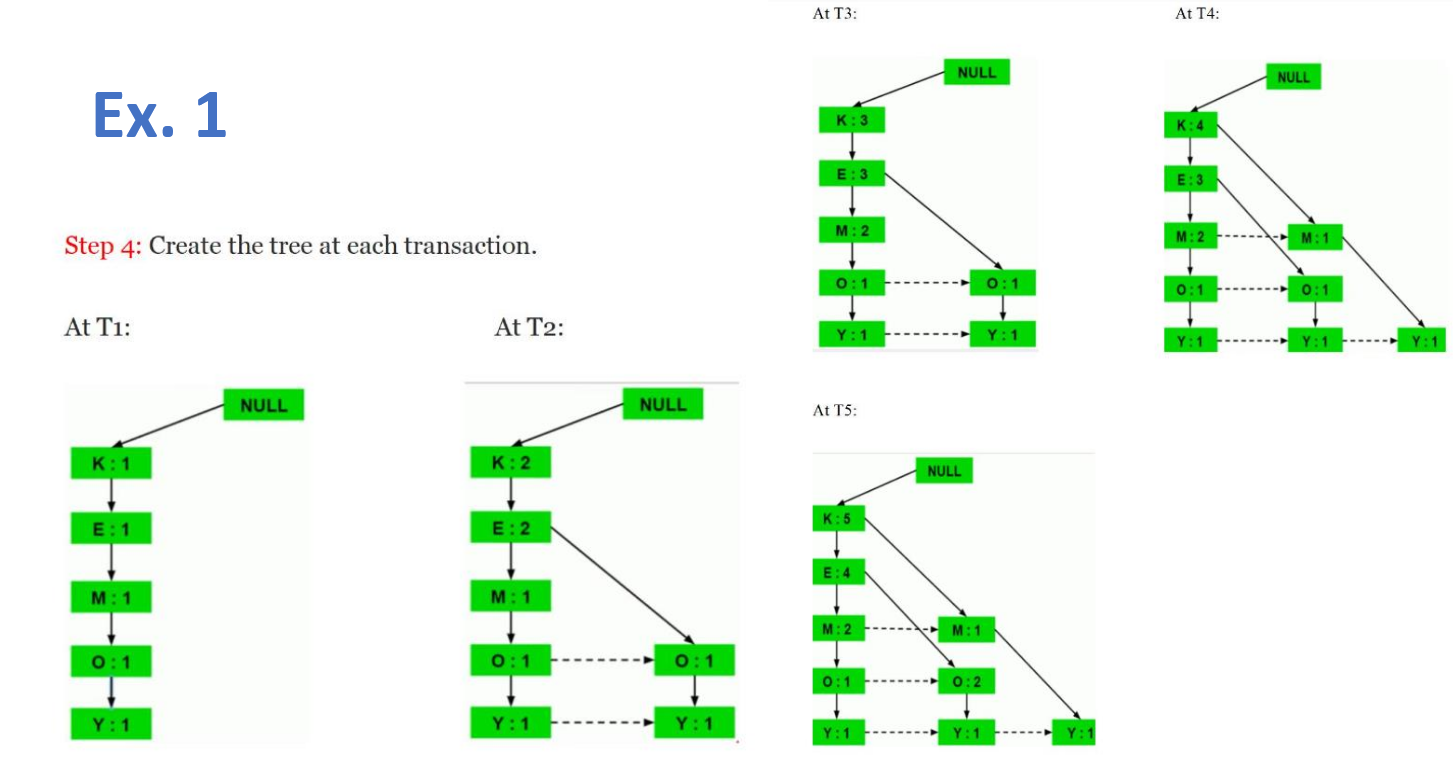

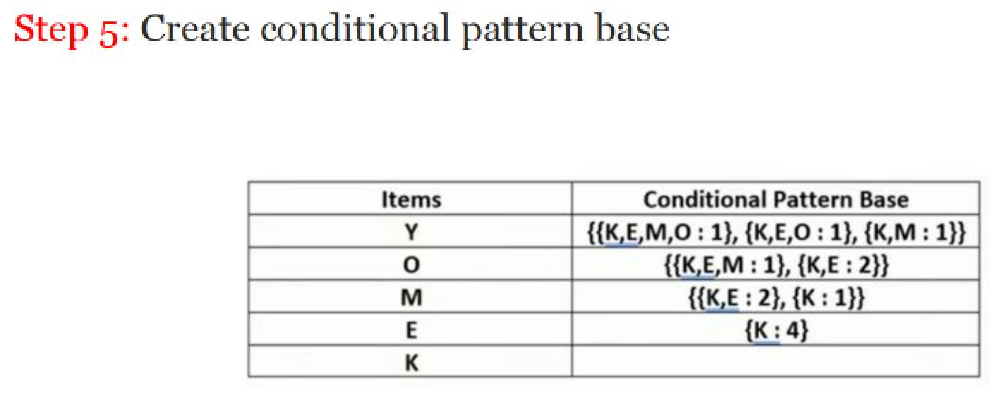

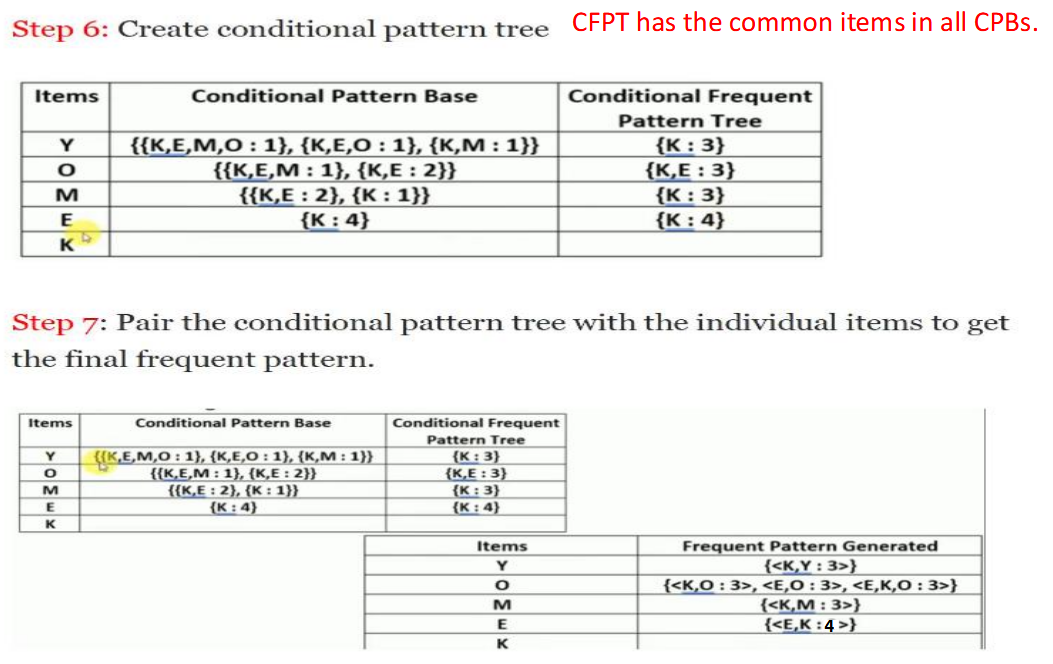

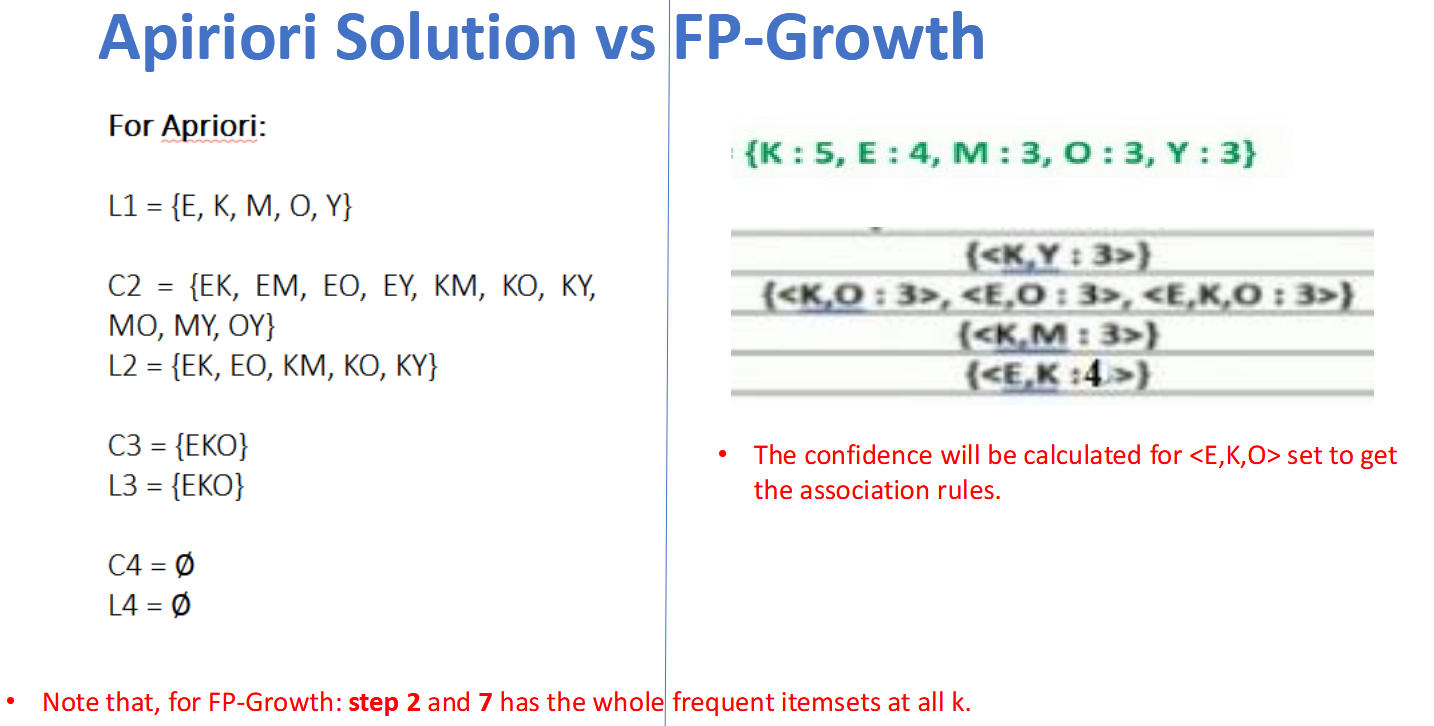

In [ ]:
# FP-Growth / FP-Tree using mlxtend
# pip install mlxtend pandas

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Transactions from the image
# Note: T5 has O repeated in the image -> in market-basket mining we count it once per transaction.
transactions = [
    ['E','K','M','N','O','Y'],   # T1
    ['D','E','K','N','O','Y'],   # T2
    ['A','E','K','M'],           # T3
    ['C','K','M','U','Y'],       # T4
    ['C','E','I','K','O']        # T5
]

# One-hot encode transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

# Given: min support count = 3
# We have 5 transactions => min_support fraction = 3/5 = 0.6
min_support = 3 / len(transactions)  # 0.6

# FP-Growth to get frequent itemsets
freq_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
freq_itemsets = freq_itemsets.sort_values(["support", "itemsets"], ascending=[False, True]).reset_index(drop=True)

print("=== Frequent Itemsets (FP-Growth) ===")
print(freq_itemsets)

# OPTIONAL: generate association rules
# Set min_confidence as you like (e.g., 0.5)
min_conf = 0.8
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=min_conf)
rules = rules.sort_values(["confidence", "support", "lift"], ascending=[False, False, False]).reset_index(drop=True)

print(f"\n=== Association Rules (confidence >= {min_conf}) ===")
print(rules[["antecedents", "consequents", "support", "confidence", "lift"]])


=== Frequent Itemsets (FP-Growth) ===
    support   itemsets
0       1.0        (K)
1       0.8        (E)
2       0.8     (E, K)
3       0.6        (Y)
4       0.6        (M)
5       0.6        (O)
6       0.6     (Y, K)
7       0.6     (K, M)
8       0.6     (E, O)
9       0.6     (O, K)
10      0.6  (E, O, K)

=== Association Rules (confidence >= 0.8) ===
  antecedents consequents  support  confidence  lift
0         (E)         (K)      0.8         1.0  1.00
1         (O)         (E)      0.6         1.0  1.25
2      (O, K)         (E)      0.6         1.0  1.25
3         (O)      (E, K)      0.6         1.0  1.25
4         (Y)         (K)      0.6         1.0  1.00
5         (M)         (K)      0.6         1.0  1.00
6         (O)         (K)      0.6         1.0  1.00
7      (O, E)         (K)      0.6         1.0  1.00
8         (K)         (E)      0.8         0.8  1.00


/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated

# 3- ECLAT

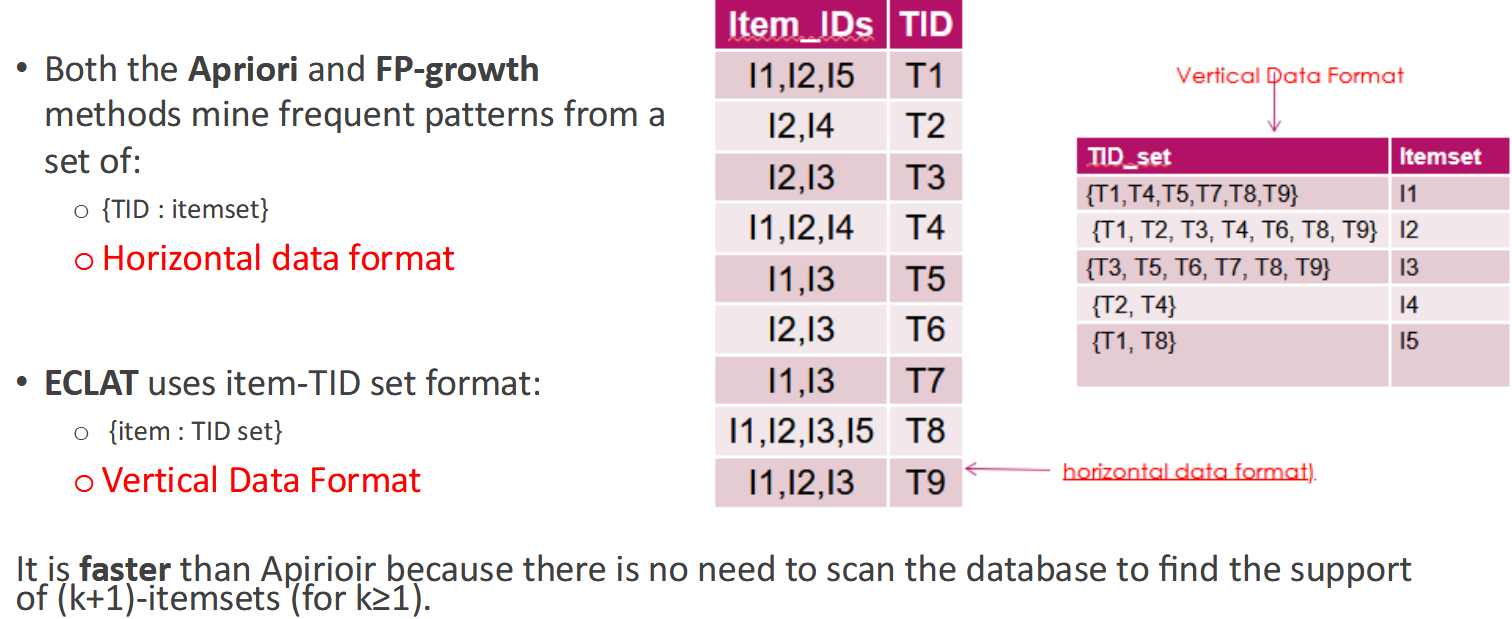

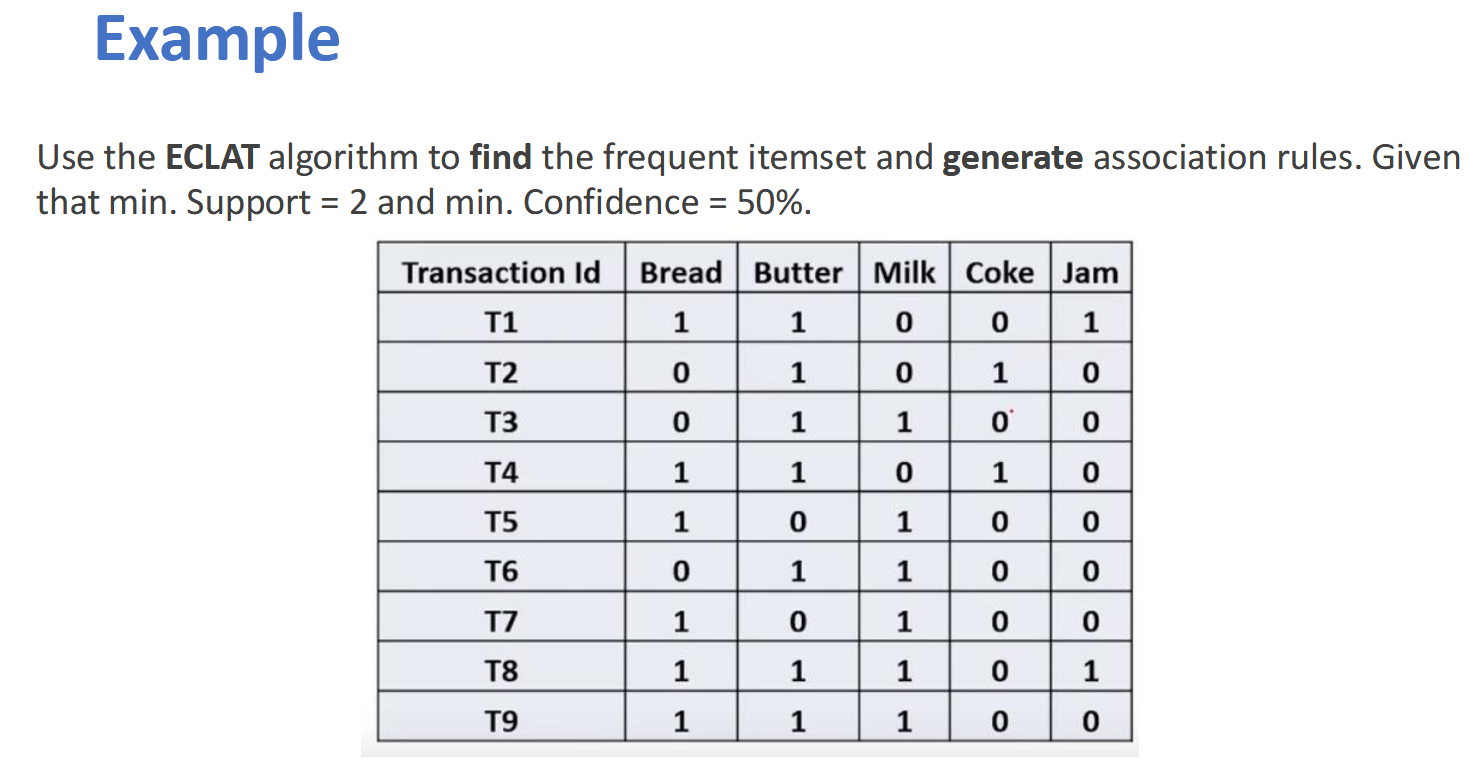

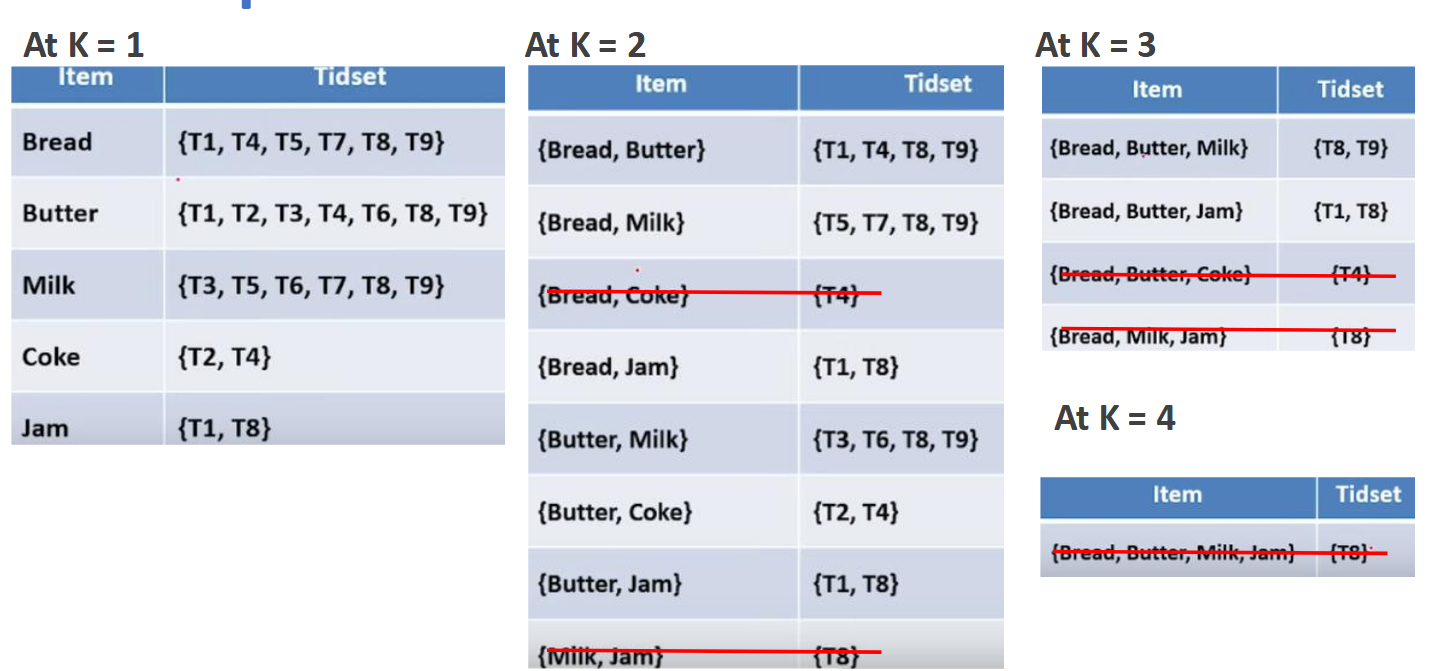

In [ ]:
! pip install pyECLAT

In [ ]:
from pyECLAT import Example1, Example2
ex1 = Example1().get()
ex1

0      1       2       3
0    milk   beer   bread  butter
1   coffe  bread  butter     NaN
2   coffe  bread  butter     NaN
3    milk  coffe   bread  butter
4    beer    NaN     NaN     NaN
5  butter    NaN     NaN     NaN
6   bread    NaN     NaN     NaN
7    bean    NaN     NaN     NaN
8    rice   bean     NaN     NaN
9    rice    NaN     NaN     NaN

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame([
    ["Bread",  "Butter", "Jam",   np.nan],
    ["Butter", "Coke",   np.nan,  np.nan],
    ["Butter", "Milk",   np.nan,  np.nan],
    ["Bread",  "Butter", "Coke",  np.nan],
    ["Bread",  "Milk",   np.nan,  np.nan],
    ["Butter", "Milk",   np.nan,  np.nan],
    ["Bread",  "Milk",   np.nan,  np.nan],
    ["Bread",  "Butter", "Milk",  "Jam"],
    ["Bread",  "Butter", "Milk",  np.nan],
])

# IMPORTANT: columns must be numeric for ECLAT
df.columns = [0, 1, 2, 3]

df

0       1     2    3
0   Bread  Butter   Jam  NaN
1  Butter    Coke   NaN  NaN
2  Butter    Milk   NaN  NaN
3   Bread  Butter  Coke  NaN
4   Bread    Milk   NaN  NaN
5  Butter    Milk   NaN  NaN
6   Bread    Milk   NaN  NaN
7   Bread  Butter  Milk  Jam
8   Bread  Butter  Milk  NaN

In [ ]:
from pyECLAT import ECLAT
eclat_instance = ECLAT(data=df, verbose=True) #verbose=True to see the loading bar
eclat_instance

100%|██████████| 5/5 [00:00<00:00, 694.26it/s]


In [ ]:
eclat_instance.df_bin   #generate a binary dataframe, that can be used for other analyzes.


Jam  Coke  Butter  Milk  Bread
0    1     0       1     0      1
1    0     1       1     0      0
2    0     0       1     1      0
3    0     1       1     0      1
4    0     0       0     1      1
5    0     0       1     1      0
6    0     0       0     1      1
7    1     0       1     1      1
8    0     0       1     1      1

In [ ]:

eclat_instance.uniq_    #a list with all the names of the different items


['Jam', 'Coke', 'Butter', nan, 'Milk', 'Bread']

In [ ]:
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.2,
                                                           min_combination=1,
                                                           max_combination=3,
                                                           separator=' & ',
                                                           verbose=True)

Combination 1 by 1


5it [00:00, 170.16it/s]


Combination 2 by 2


10it [00:00, 187.42it/s]


Combination 3 by 3


10it [00:00, 236.19it/s]


In [ ]:
get_ECLAT_indexes

{'Jam': [0, 7],
 'Coke': [1, 3],
 'Butter': [0, 1, 2, 3, 5, 7, 8],
 'Milk': [2, 4, 5, 6, 7, 8],
 'Bread': [0, 3, 4, 6, 7, 8],
 'Jam & Butter': [0, 7],
 'Jam & Bread': [0, 7],
 'Coke & Butter': [1, 3],
 'Butter & Milk': [2, 5, 7, 8],
 'Butter & Bread': [0, 3, 7, 8],
 'Milk & Bread': [4, 6, 7, 8],
 'Jam & Butter & Bread': [0, 7],
 'Butter & Milk & Bread': [7, 8]}

In [ ]:
get_ECLAT_supports

{'Jam': 0.2222222222222222,
 'Coke': 0.2222222222222222,
 'Butter': 0.7777777777777778,
 'Milk': 0.6666666666666666,
 'Bread': 0.6666666666666666,
 'Jam & Butter': 0.2222222222222222,
 'Jam & Bread': 0.2222222222222222,
 'Coke & Butter': 0.2222222222222222,
 'Butter & Milk': 0.4444444444444444,
 'Butter & Bread': 0.4444444444444444,
 'Milk & Bread': 0.4444444444444444,
 'Jam & Butter & Bread': 0.2222222222222222,
 'Butter & Milk & Bread': 0.2222222222222222}

In [ ]:
help(eclat_instance.fit)
help(eclat_instance.fit_all)
help(eclat_instance.support)

Help on method fit in module pyECLAT.pyECLAT:

fit(min_support=0.08, min_combination=1, max_combination=3, separator=' & ', verbose=True) method of pyECLAT.pyECLAT.ECLAT instance
    Return a dictionary. The key is the feature and value is support. A high number of
    combinations (greater than three) can take a long time to finish.


    Arguments
    ---------------------
    min_support
        Must be 'None' to return all features and supports or 'Float' to filter features by support
    min_combination
        Minimal combination of attributes
    max_combination
        Maximum combination of attributes
    separator
        Separator for the output dictionary key. Just to organize. default = ' & '
    verbose
        `True` to enable the loading bar.

Help on method fit_all in module pyECLAT.pyECLAT:

fit_all(min_support=0.08, separator=' & ', verbose=False, min_combination=1) method of pyECLAT.pyECLAT.ECLAT instance
    Return a dictionary. The key is the feature and value is 